## Import packages

In [1]:
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import logging
import sys

from multiprocessing import Pool
from functools import partial

sys.path.append('..')
from helper.helpers import *

root = logging.getLogger()
root.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(levelname)s - %(asctime)s: %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)
logging.info('Packages and logging up and running!')

INFO - 2019-05-18 15:16:05,011: Packages and logging up and running!


In [2]:
DATA_PATH = '../../data/pcaps/csv/'
N_PROCESESS = 8
files_list = get_file_list(DATA_PATH, word='csv')
files_list

['iotpot2_all_subset.pcap.csv',
 'iotpot2_all_subset1.pcap.csv',
 'iotpot2_all_subset10.pcap.csv',
 'iotpot2_all_subset11.pcap.csv',
 'iotpot2_all_subset12.pcap.csv',
 'iotpot2_all_subset13.pcap.csv',
 'iotpot2_all_subset14.pcap.csv',
 'iotpot2_all_subset2.pcap.csv',
 'iotpot2_all_subset3.pcap.csv',
 'iotpot2_all_subset4.pcap.csv',
 'iotpot2_all_subset5.pcap.csv',
 'iotpot2_all_subset6.pcap.csv',
 'iotpot2_all_subset7.pcap.csv',
 'iotpot2_all_subset8.pcap.csv',
 'iotpot2_all_subset9.pcap.csv']

## Load all files

In [7]:
def read_csv(filename, path):
    logging.info(f'Loading file {filename}')
    return pd.read_csv(os.path.join(DATA_PATH, filename),
                       sep='\t')

pool = Pool(processes=N_PROCESESS)
pool_read_csv = partial(read_csv, path=DATA_PATH)
df_list = pool.map(pool_read_csv, files_list)

INFO - 2019-05-18 15:18:26,676: Loading file iotpot2_all_subset.pcap.csv
INFO - 2019-05-18 15:18:26,677: Loading file iotpot2_all_subset13.pcap.csv
INFO - 2019-05-18 15:18:26,676: Loading file iotpot2_all_subset12.pcap.csv
INFO - 2019-05-18 15:18:26,677: Loading file iotpot2_all_subset14.pcap.csv
INFO - 2019-05-18 15:18:26,676: Loading file iotpot2_all_subset10.pcap.csv
INFO - 2019-05-18 15:18:26,677: Loading file iotpot2_all_subset2.pcap.csv
INFO - 2019-05-18 15:18:26,676: Loading file iotpot2_all_subset1.pcap.csv
INFO - 2019-05-18 15:18:26,676: Loading file iotpot2_all_subset11.pcap.csv
INFO - 2019-05-18 15:18:38,449: Loading file iotpot2_all_subset3.pcap.csv
INFO - 2019-05-18 15:18:46,461: Loading file iotpot2_all_subset4.pcap.csv
INFO - 2019-05-18 15:18:54,037: Loading file iotpot2_all_subset5.pcap.csv
INFO - 2019-05-18 15:18:59,105: Loading file iotpot2_all_subset6.pcap.csv
INFO - 2019-05-18 15:19:06,053: Loading file iotpot2_all_subset7.pcap.csv
INFO - 2019-05-18 15:19:10,488: Lo

In [8]:
for df in df_list:
    df = df.set_index('Timestamp')
    print(df.shape)

(666539, 17)
(643447, 17)
(697100, 17)
(770533, 17)
(671370, 17)
(668903, 17)
(565314, 17)
(652948, 17)
(648309, 17)
(651648, 17)
(738306, 17)
(771146, 17)
(670780, 17)
(657346, 17)
(697839, 17)


In [9]:
data = pd.concat(df_list, sort=True)
del df_list, pool, pool_read_csv

In [10]:
data = data.set_index('Timestamp')
data = data.sort_index()
data.index = pd.to_datetime(data.index)

## Start feature exploration

In [11]:
data.head()

,IP1,IP1_0,IP1_1,IP1_2,IP1_3,IP2,IP2_0,IP2_1,IP2_2,IP2_3,Length,Payload,Port1,Port2,is_busybox,is_enable,is_sh
Timestamp,,,,,,,,,,,,,,,,,
2019-02-01 09:37:56.421462,71.6.146.185,71,6,146,185,133.34.156.185,133,34,156,185,44,b'\x00\x00',24858,8649,0,0,0
2019-02-01 09:37:56.446036,185.176.27.114,185,176,27,114,133.34.156.140,133,34,156,140,40,b'\x00\x00\x00\x00\x00\x00',52462,6334,0,0,0
2019-02-01 09:37:56.512569,104.248.37.237,104,248,37,237,133.34.156.78,133,34,156,78,52,NaN,43082,23,0,0,0
2019-02-01 09:37:56.549846,209.141.57.185,209,141,57,185,133.34.156.140,133,34,156,140,60,NaN,32860,2323,0,0,0
2019-02-01 09:37:56.550018,151.73.61.209,151,73,61,209,133.34.156.65,133,34,156,65,40,b'\x00\x00\x00\x00\x00\x00',45431,23,0,0,0


<BarContainer object of 16 artists>

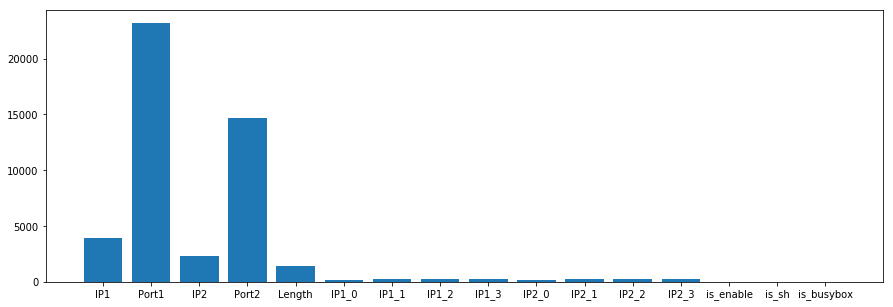

In [32]:
unique_counts = df.apply(lambda x: len(x.unique())).drop('Payload')

fig = plt.figure(figsize=(15, 5))
plt.bar(x=unique_counts.index, height=unique_counts.values)

In [35]:
is_vars = [c for c in data.columns if 'is' in c]
data[is_vars].apply(lambda x: x.value_counts())

,is_busybox,is_enable,is_sh
0,9812548,10114993,9643741
1,358980,56535,527787


Most binary features are 

### Get most used nets/host and ports

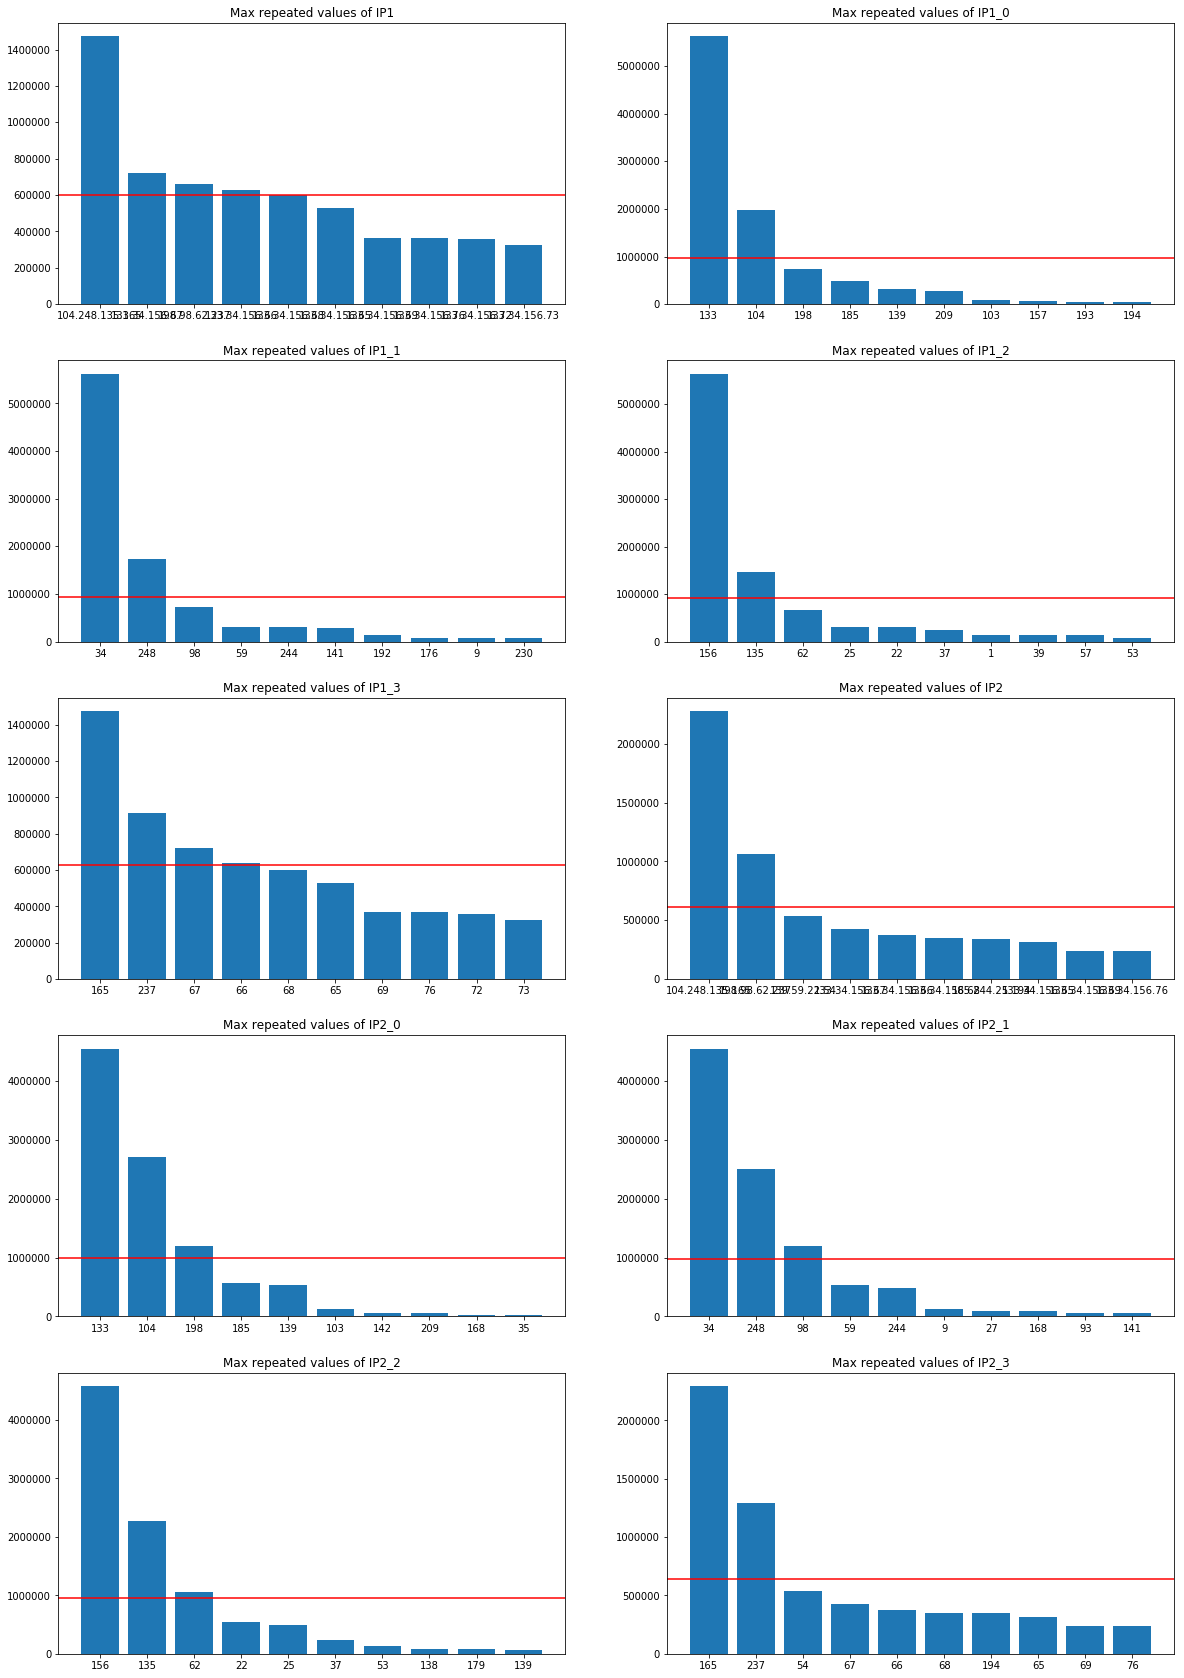

In [57]:
ip_vars = [c for c in data.columns if 'IP' in c]

fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(20,30))

for idx, var in enumerate(ip_vars):
    tmp = data[var].value_counts().sort_values(ascending=False)[:10]
    row = idx//2 
    col = idx%2
    ax[row][col].bar(x=tmp.index.astype('str'), height=tmp.values)
    ax[row][col].axhline(y=tmp.values.mean(), color='r', linestyle='-')
    ax[row][col].set_title(f'Max repeated values of {var}')

**Insights**

* Most common source ip almost doubles second most common source IP
* Similar pattern (but it doubles count this time) appears in destiny IP
* Nets and subnets appear to have three large source and destiny spaces
* Hosts of source IP appear to be more distributed
* Hosts of destiny IP hace two large destinies (might be from common ip of artifact?) and every other is below average



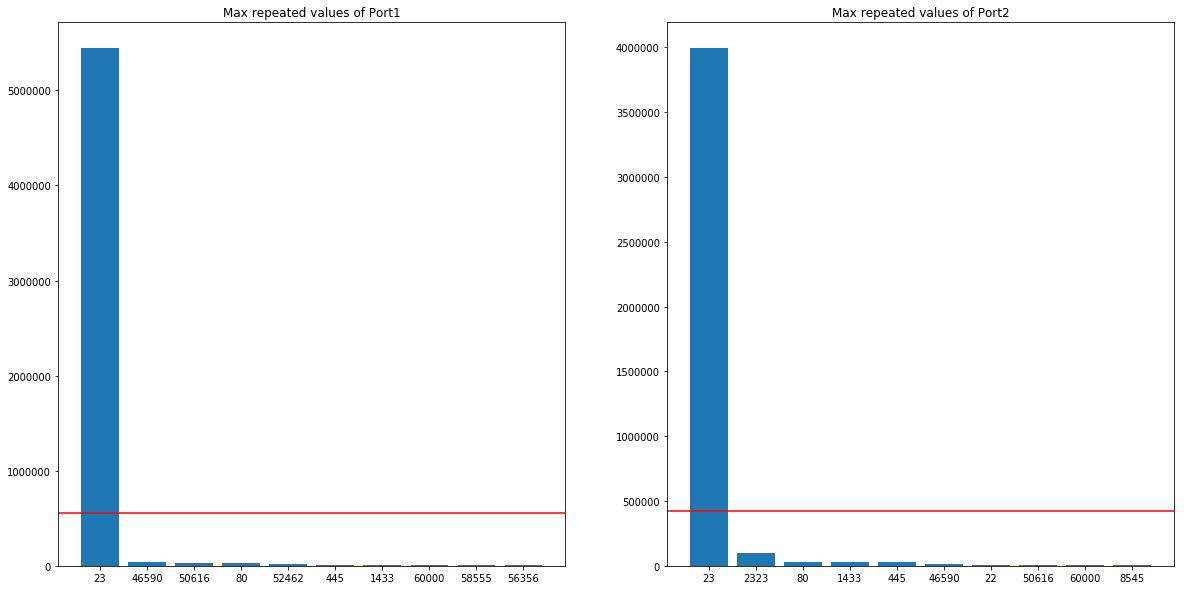

In [59]:
port_vars = [c for c in data.columns if 'Port' in c]

fig, ax = plt.subplots(ncols=2, figsize=(20,10))

for idx, var in enumerate(port_vars):
    tmp = data[var].value_counts().sort_values(ascending=False)[:10]
    col = idx%2
    ax[col].bar(x=tmp.index.astype('str'), height=tmp.values)
    ax[col].axhline(y=tmp.values.mean(), color='r', linestyle='-')
    ax[col].set_title(f'Max repeated values of {var}')

**Insights**

* Most common port is 23, commonly used for Telnet connections
* Commonly ports between 49152–65535  are usef for efimeral source connections
* Port 80 on destiny port might be for http (web), whereas in source port its not as common [wiki](https://security.stackexchange.com/questions/29522/incoming-packet-from-source-port-80)
* Port 445 is commonly used for file sharing
* Port 1433 is commonly used in Microsoft SQL Server
* Port 2323 might be an alternate port for Telnet in IoT devices [source](https://isc.sans.edu/forums/diary/What+is+happening+on+2323TCP/21563/)
* 22 is commonly used for ssh
* Ports 46590, 50616 and 60000 appear in both, usually used as dynamic ports

*[Source](https://en.wikipedia.org/wiki/List_of_TCP_and_UDP_port_numbers) for ports common usages*

## Connections with various windows

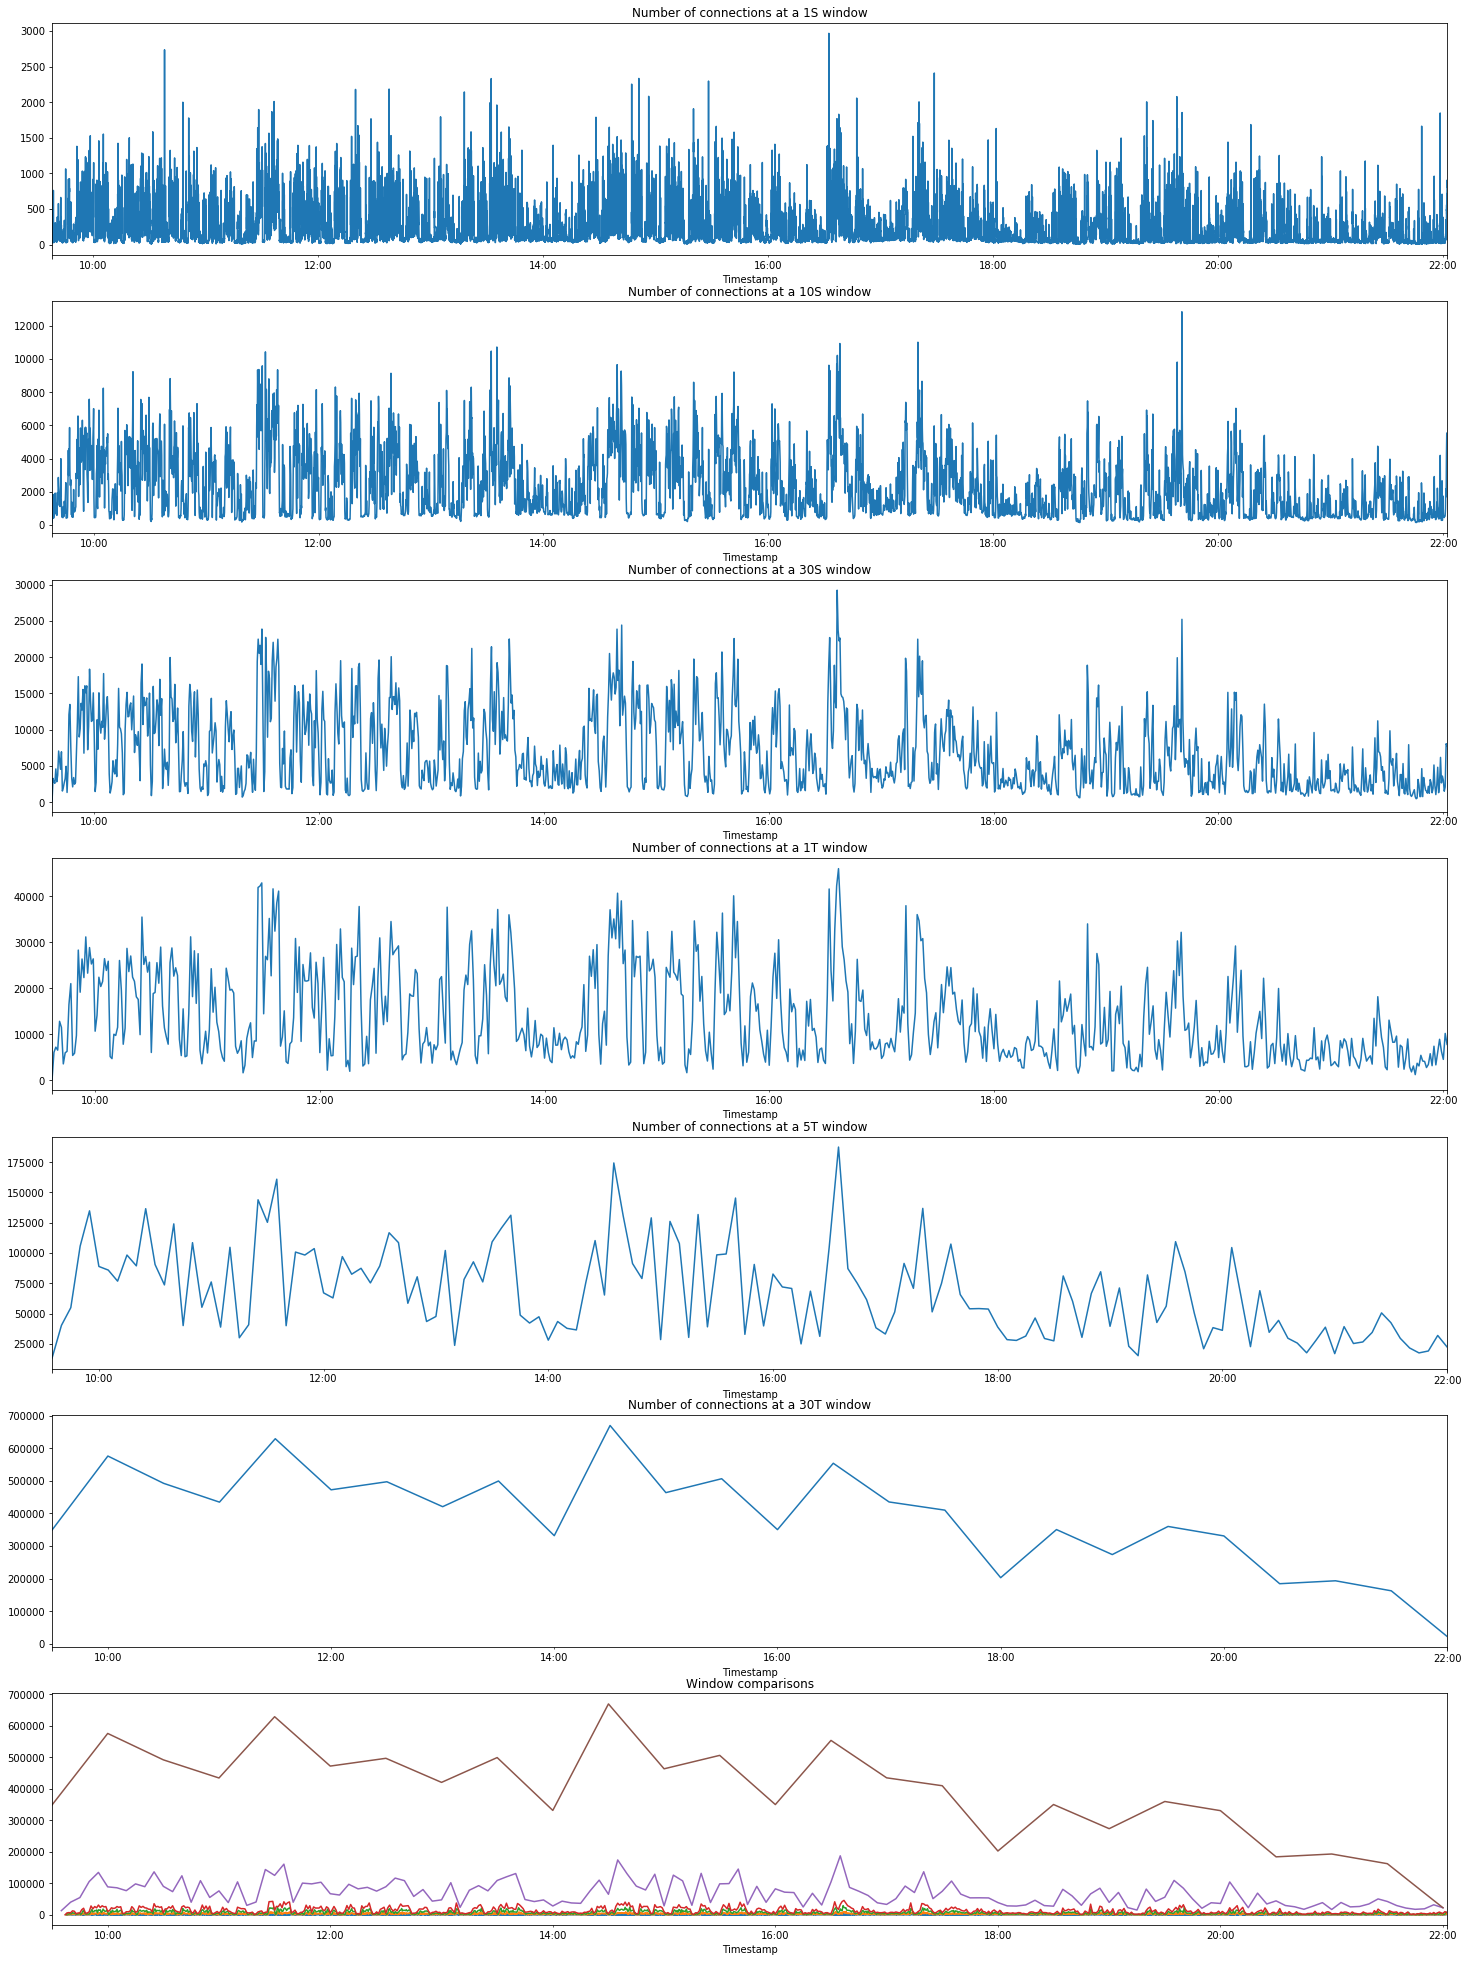

In [79]:
windows = ['1S', '10S', '30S', '1T', '5T', '30T']
l = len(windows)
fig, ax = plt.subplots(nrows=l+1, figsize=(25,5*(l+1)))

for idx, wd in enumerate(windows):
    data['IP1'].resample(wd).count().plot(ax=ax[idx])
    ax[idx].set_title(f'Number of connections at a {wd} window')
    data['IP1'].resample(wd).count().plot(ax=ax[l])
ax[l].set_title("Window comparisons")
plt.show()

* Use decays after 11 and shortly it spikes
* Unsual valley at 14:00
* Decays again at 16:00 and 18:00
* Overall usage between 10:00 and 18:00, downward trend after that

In [80]:
data.head()

,IP1,IP1_0,IP1_1,IP1_2,IP1_3,IP2,IP2_0,IP2_1,IP2_2,IP2_3,Length,Payload,Port1,Port2,is_busybox,is_enable,is_sh
Timestamp,,,,,,,,,,,,,,,,,
2019-02-01 09:37:56.421462,71.6.146.185,71,6,146,185,133.34.156.185,133,34,156,185,44,b'\x00\x00',24858,8649,0,0,0
2019-02-01 09:37:56.446036,185.176.27.114,185,176,27,114,133.34.156.140,133,34,156,140,40,b'\x00\x00\x00\x00\x00\x00',52462,6334,0,0,0
2019-02-01 09:37:56.512569,104.248.37.237,104,248,37,237,133.34.156.78,133,34,156,78,52,NaN,43082,23,0,0,0
2019-02-01 09:37:56.549846,209.141.57.185,209,141,57,185,133.34.156.140,133,34,156,140,60,NaN,32860,2323,0,0,0
2019-02-01 09:37:56.550018,151.73.61.209,151,73,61,209,133.34.156.65,133,34,156,65,40,b'\x00\x00\x00\x00\x00\x00',45431,23,0,0,0


## Length distribution

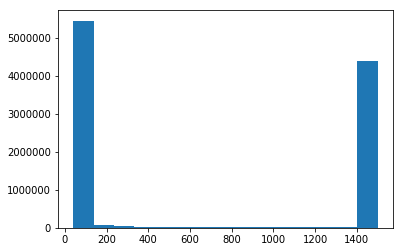

In [97]:
plt.hist(data['Length'], bins=15)
plt.show()

Most packages either have very little payload or very much, not common lengths between

Timestamp
2019-02-01 09:37:56.421462       71.6.146.185
2019-02-01 09:37:56.446036     185.176.27.114
2019-02-01 09:37:56.512569     104.248.37.237
2019-02-01 09:37:56.549846     209.141.57.185
2019-02-01 09:37:56.550018      151.73.61.209
2019-02-01 09:37:56.551881     209.141.57.185
2019-02-01 09:37:56.559756      133.34.156.65
2019-02-01 09:37:56.650515       104.192.1.15
2019-02-01 09:37:56.651864       104.192.1.15
2019-02-01 09:37:56.655692       104.192.1.15
2019-02-01 09:37:56.679839       104.192.1.15
2019-02-01 09:37:56.684997      151.73.61.209
2019-02-01 09:37:56.686662      133.34.156.65
2019-02-01 09:37:56.716753     185.176.27.102
2019-02-01 09:37:56.737841     104.248.37.237
2019-02-01 09:37:56.756358     104.248.37.237
2019-02-01 09:37:56.758395    185.222.202.118
2019-02-01 09:37:56.758396    185.222.202.118
2019-02-01 09:37:56.809156     216.218.206.85
2019-02-01 09:37:56.818671    185.222.202.118
2019-02-01 09:37:56.819201    185.222.202.118
2019-02-01 09:37:56.8210